# Exploring Relationships through Correlation Coefficients

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlation matrix and heatmap
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


In [4]:
low_memory = False

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Define path

path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 6 - Advanced Analytics and Dashboard Design/COVID-19 Public Transit Project'

In [7]:
# Import data 

df_commuter_transit = pd.read_csv(os.path.join(path, 'Datasets', 'Transformed Data', 'commuter_transit_master_2018_to_2022.csv'))


### 2. Data Cleaning

In [8]:
df_commuter_transit.dtypes

UZA Name                                           object
UACE Code                                           int64
Year                                                int64
Transit Trips                                       int64
Transit Vehicle Miles                               int64
Commute by Car, Truck, or Van                     float64
Commute by Drove alone                            float64
Commute by Carpooled                              float64
Commute by 2-person Carpool                       float64
Commute by 3-person Carpool                       float64
Commute by 4-or-more-person Carpool               float64
Average Number of Workers per Car                 float64
Commute by Public Transportation                  float64
Commute by Walking                                float64
Commute by Bicycle                                float64
Commute by Taxicab, Motorcycle, or Other means    float64
Commute by Work from Home                         float64
Commute Time <

In [9]:
df_commuter_transit.head()

,UZA Name,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Drove alone,Commute by Carpooled,Commute by 2-person Carpool,Commute by 3-person Carpool,Commute by 4-or-more-person Carpool,Average Number of Workers per Car,Commute by Public Transportation,Commute by Walking,Commute by Bicycle,"Commute by Taxicab, Motorcycle, or Other means",Commute by Work from Home,Commute Time <10 Minutes,Commute Time 10 to 14 Minutes,Commute Time 15 to 19 Minutes,Commute Time 20 to 24 Minutes,Commute Time 25 to 29 Minutes,Commute Time 30 to 34 Minutes,Commute Time 35 to 44 Minutes,Commute Time 45 to 59 Minutes,Commute Time >60 Minutes,Mean Commute Time,Depart Time 12:00 a.m. to 4:59 a.m.,Depart Time 5:00 a.m. to 5:29 a.m.,Depart Time 5:30 a.m. to 5:59 a.m.,Depart Time 6:00 a.m. to 6:29 a.m.,Depart Time 6:30 a.m. to 6:59 a.m.,Depart Time 7:00 a.m. to 7:29 a.m.,Depart Time 7:30 a.m. to 7:59 a.m.,Depart Time 8:00 a.m. to 8:29 a.m.,Depart Time 8:30 a.m. to 8:59 a.m.,Depart Time 9:00 a.m. to 11:59 p.m.,Workers 16 Years and Over in Households,Households with 0 Vehicles available,Households with 1 Vehicle Available,Households with 2 Vehicles Available,Households with 3 or More Vehicles Available,Worked in State of Residence,Worked in County of Residence,Worked Outside County of Residence,Worked Outside State of Residence,Living in a Place,Worked in Place of Residence,Worked Outside Place of Residence,Not living in a place,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density
0,"Abilene, TX",280,2018,0,0,91.3,76.7,14.6,10.3,2.3,2.0,1.10,0.1,1.6,0.0,1.2,5.7,24.8,29.7,26.2,11.0,0.5,3.4,0.7,1.2,2.6,15.2,5.5,2.4,5.0,4.1,9.1,13.7,20.0,8.4,6.2,25.4,54675,2.9,27.3,46.2,23.6,99.8,94.0,5.8,0.2,99.6,88.7,10.9,0.4,1.905,118138,50514,61.97,1906.4
1,"Abilene, TX",280,2019,0,0,90.6,79.9,10.7,8.2,1.9,0.6,1.07,0.2,1.9,0.6,1.0,5.6,24.9,25.4,29.6,11.8,1.4,3.3,0.6,1.7,1.3,14.6,5.0,2.2,4.0,6.1,9.3,12.2,18.2,10.9,6.6,25.3,54753,2.4,20.6,50.3,26.7,99.6,95.8,3.8,0.4,99.6,90.7,8.9,0.4,2.013,118138,50514,61.97,1906.4
2,"Abilene, TX",280,2020,0,0,89.8,78.8,11.0,8.3,1.5,1.2,1.07,0.8,2.4,0.2,0.7,6.1,24.4,27.7,26.3,11.0,1.4,3.7,0.8,1.3,3.3,16.0,5.8,2.2,4.6,4.9,9.5,12.4,19.8,9.1,5.6,26.3,54839,2.7,23.3,48.3,25.7,99.8,93.5,6.3,0.2,99.4,88.6,10.8,0.6,1.970,118138,50514,61.97,1906.4
3,"Abilene, TX",280,2022,0,0,87.7,77.8,9.9,7.3,1.6,0.9,1.07,0.9,2.1,0.0,1.0,8.4,21.1,28.6,27.1,14.3,2.7,2.3,1.2,1.2,1.6,14.9,3.4,2.4,3.6,6.5,13.2,12.2,19.9,8.2,6.1,24.6,59559,2.9,21.8,47.8,27.5,97.3,93.9,3.3,2.7,99.8,90.8,9.0,0.2,1.999,118138,50514,61.97,1906.4
4,"Akron, OH",766,2018,6365983,7530163,90.1,82.4,7.7,5.5,1.3,0.8,1.05,2.0,2.0,0.3,0.6,5.1,12.5,15.2,16.4,17.9,9.4,12.1,6.3,6.1,4.2,23.1,3.4,2.9,5.3,9.1,11.5,14.6,11.6,10.2,5.0,26.4,272448,4.0,19.6,45.2,31.2,99.4,70.9,28.5,0.6,84.9,26.4,58.5,15.1,2.036,541879,251080,300.64,1802.4


#### Missing Values Check:

In [10]:
# Check for missing values

df_commuter_transit.isnull().sum() # No missing values!

UZA Name                                          0
UACE Code                                         0
Year                                              0
Transit Trips                                     0
Transit Vehicle Miles                             0
Commute by Car, Truck, or Van                     0
Commute by Drove alone                            0
Commute by Carpooled                              0
Commute by 2-person Carpool                       0
Commute by 3-person Carpool                       0
Commute by 4-or-more-person Carpool               0
Average Number of Workers per Car                 0
Commute by Public Transportation                  0
Commute by Walking                                0
Commute by Bicycle                                0
Commute by Taxicab, Motorcycle, or Other means    0
Commute by Work from Home                         0
Commute Time <10 Minutes                          0
Commute Time 10 to 14 Minutes                     0
Commute Time

#### Duplicates Check:

In [11]:
# Find duplicates

df_commuter_transit_dups = df_commuter_transit[df_commuter_transit.duplicated()]

In [12]:
df_commuter_transit_dups.shape # No duplicates!

(0, 55)

#### Mixed-Type Data:

In [13]:
for col in df_commuter_transit.columns.tolist():
      weird = (df_commuter_transit[[col]].applymap(type) != df_commuter_transit[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_commuter_transit[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3. Exploring Relationships

In [14]:
# Create a filtered dataframe based on a population threshold of 500,000
df_commuter_transit_filtered = df_commuter_transit[df_commuter_transit['Population'] > 500000]

In [15]:
df_commuter_transit_filtered.reset_index(drop = True, inplace = True)

In [16]:
df_commuter_transit_filtered.shape

(393, 55)

#### Correlation matrix and heatmap

In [17]:
# Specify the columns you want to include in the correlation analysis
selected_columns = [
    'Commute by Car, Truck, or Van',
    'Average Number of Vehicles per Household',
    'Commute by Public Transportation',
    'Commute by Bicycle',
    'Commute by Work from Home',
    'Mean Commute Time',
    'Transit Trips',
    'Transit Vehicle Miles',
    'Population',
    'Land Area',
    'Population Density'
    
]

# Create a new DataFrame with only the selected columns
df_selected = df_commuter_transit_filtered[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()


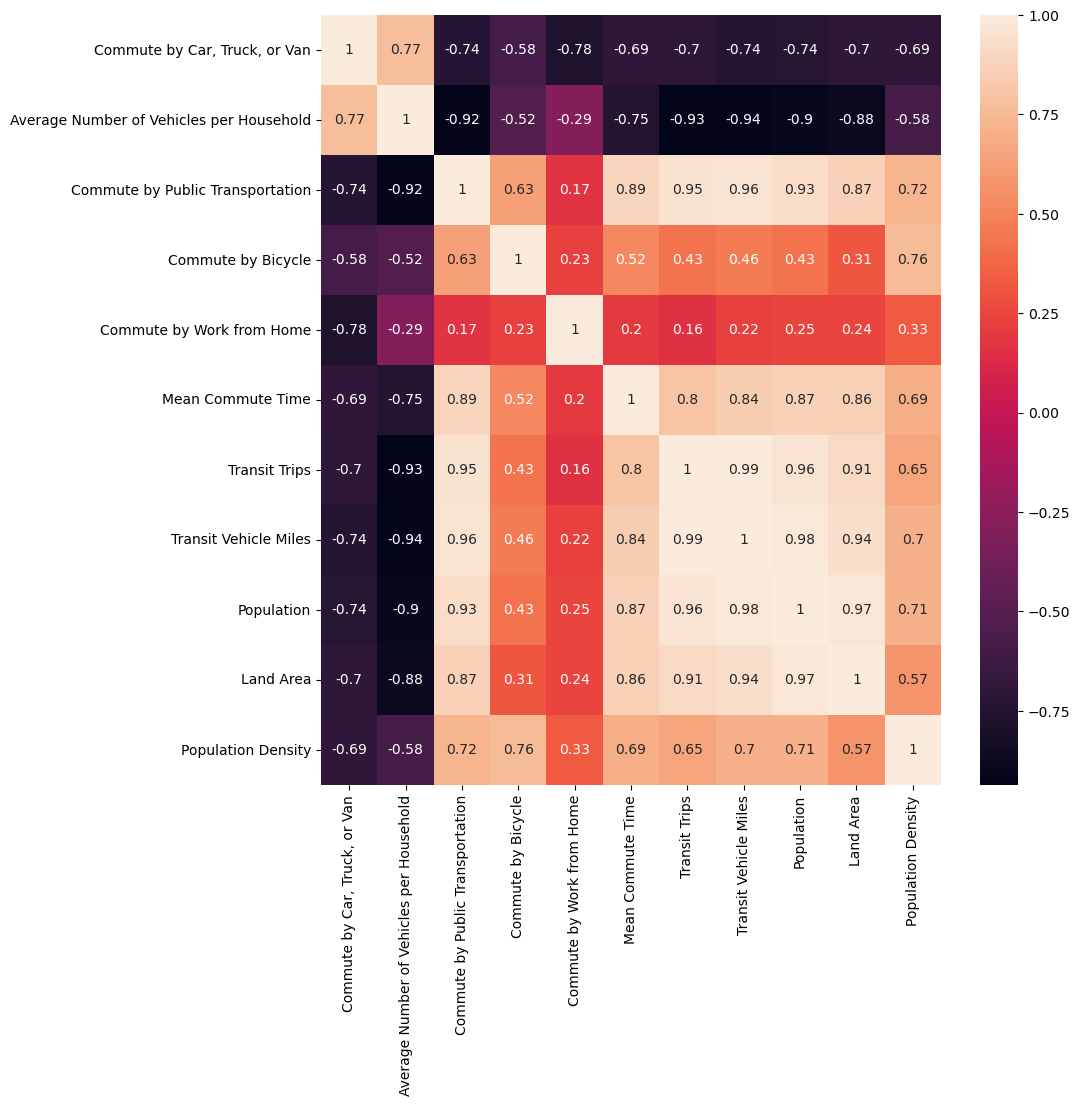

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(correlation_matrix.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Scatterplots

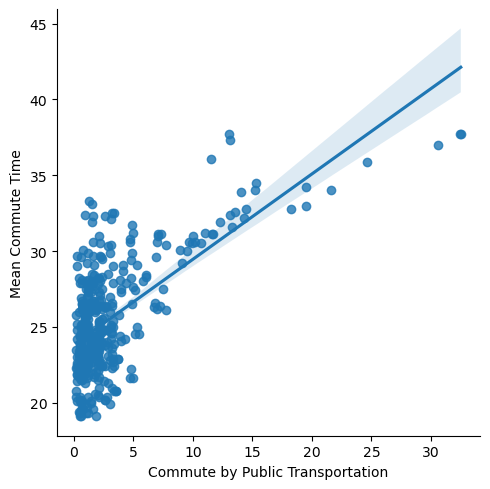

In [19]:
# Create a scatterplot for the "Commute by Public Transportation" and "Mean Commute Time" columns in seaborn

sns.lmplot(x = 'Commute by Public Transportation', y = 'Mean Commute Time', data = df_commuter_transit_filtered)

This scatterplot shows that commuting by public transportation has a positive correlation with mean commute time in an urban area.

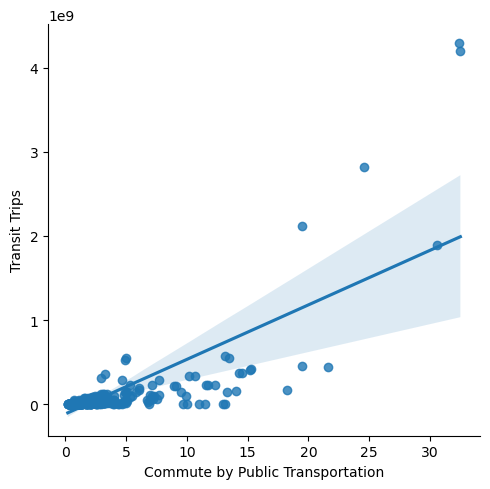

In [20]:
# Create a scatterplot for the "Commute by Public Transportation" and "Transit Trips" columns in seaborn

sns.lmplot(x = 'Commute by Public Transportation', y = 'Transit Trips', data = df_commuter_transit_filtered)

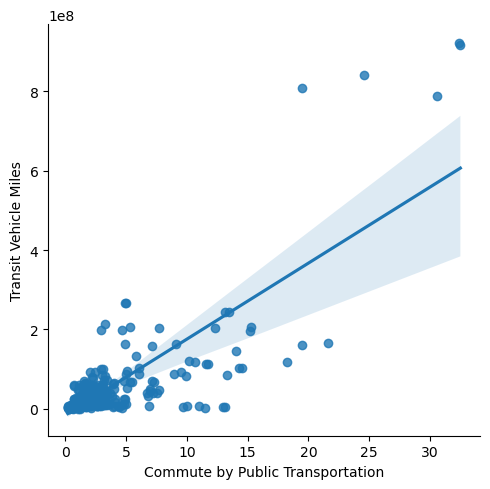

In [23]:
# Create a scatterplot for the "Commute by Public Transportation" and "Transit Vehicle Miles" columns in seaborn

sns.lmplot(x = 'Commute by Public Transportation', y = 'Transit Vehicle Miles', data = df_commuter_transit_filtered)

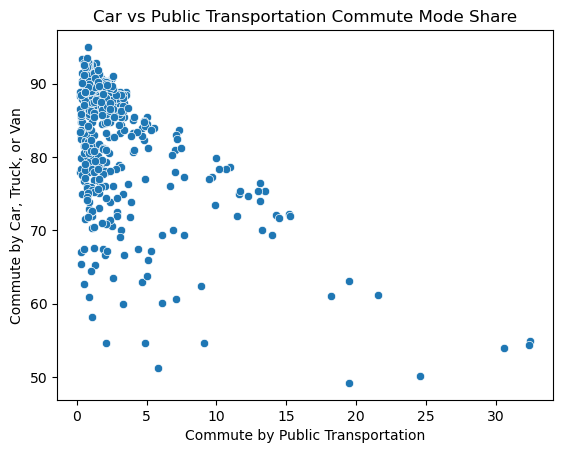

In [28]:
# Scatterplot with hue
sns.scatterplot(x='Commute by Public Transportation', y='Commute by Car, Truck, or Van', data=df_commuter_transit_filtered)

# Title
plt.title('Car vs Public Transportation Commute Mode Share')

# Show the plot
plt.show()

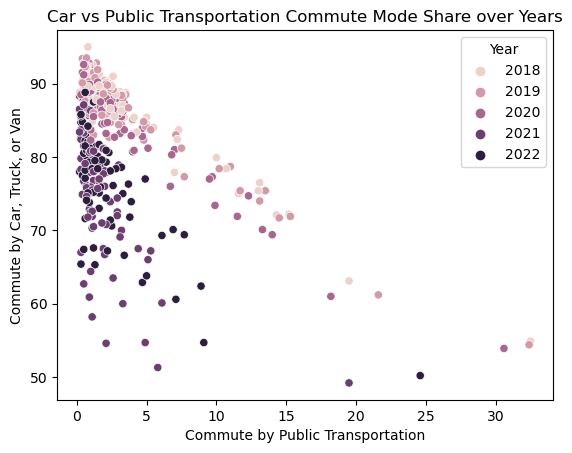

In [27]:
# Scatterplot with hue
sns.scatterplot(x='Commute by Public Transportation', y='Commute by Car, Truck, or Van', hue='Year', data=df_commuter_transit_filtered)

# Title
plt.title('Car vs Public Transportation Commute Mode Share over Years')

# Show the plot
plt.show()

#### Pair plots

In [19]:
# Keep only the variables you want to use in the pair plot

df_commuter_transit_filtered_2 = df_commuter_transit_filtered[['Mean Commute Time', 'Commute by Car, Truck, or Van', 'Commute by Public Transportation', 'Transit Trips', 'Transit Vehicle Miles', 'Land Area', 'Population Density']]


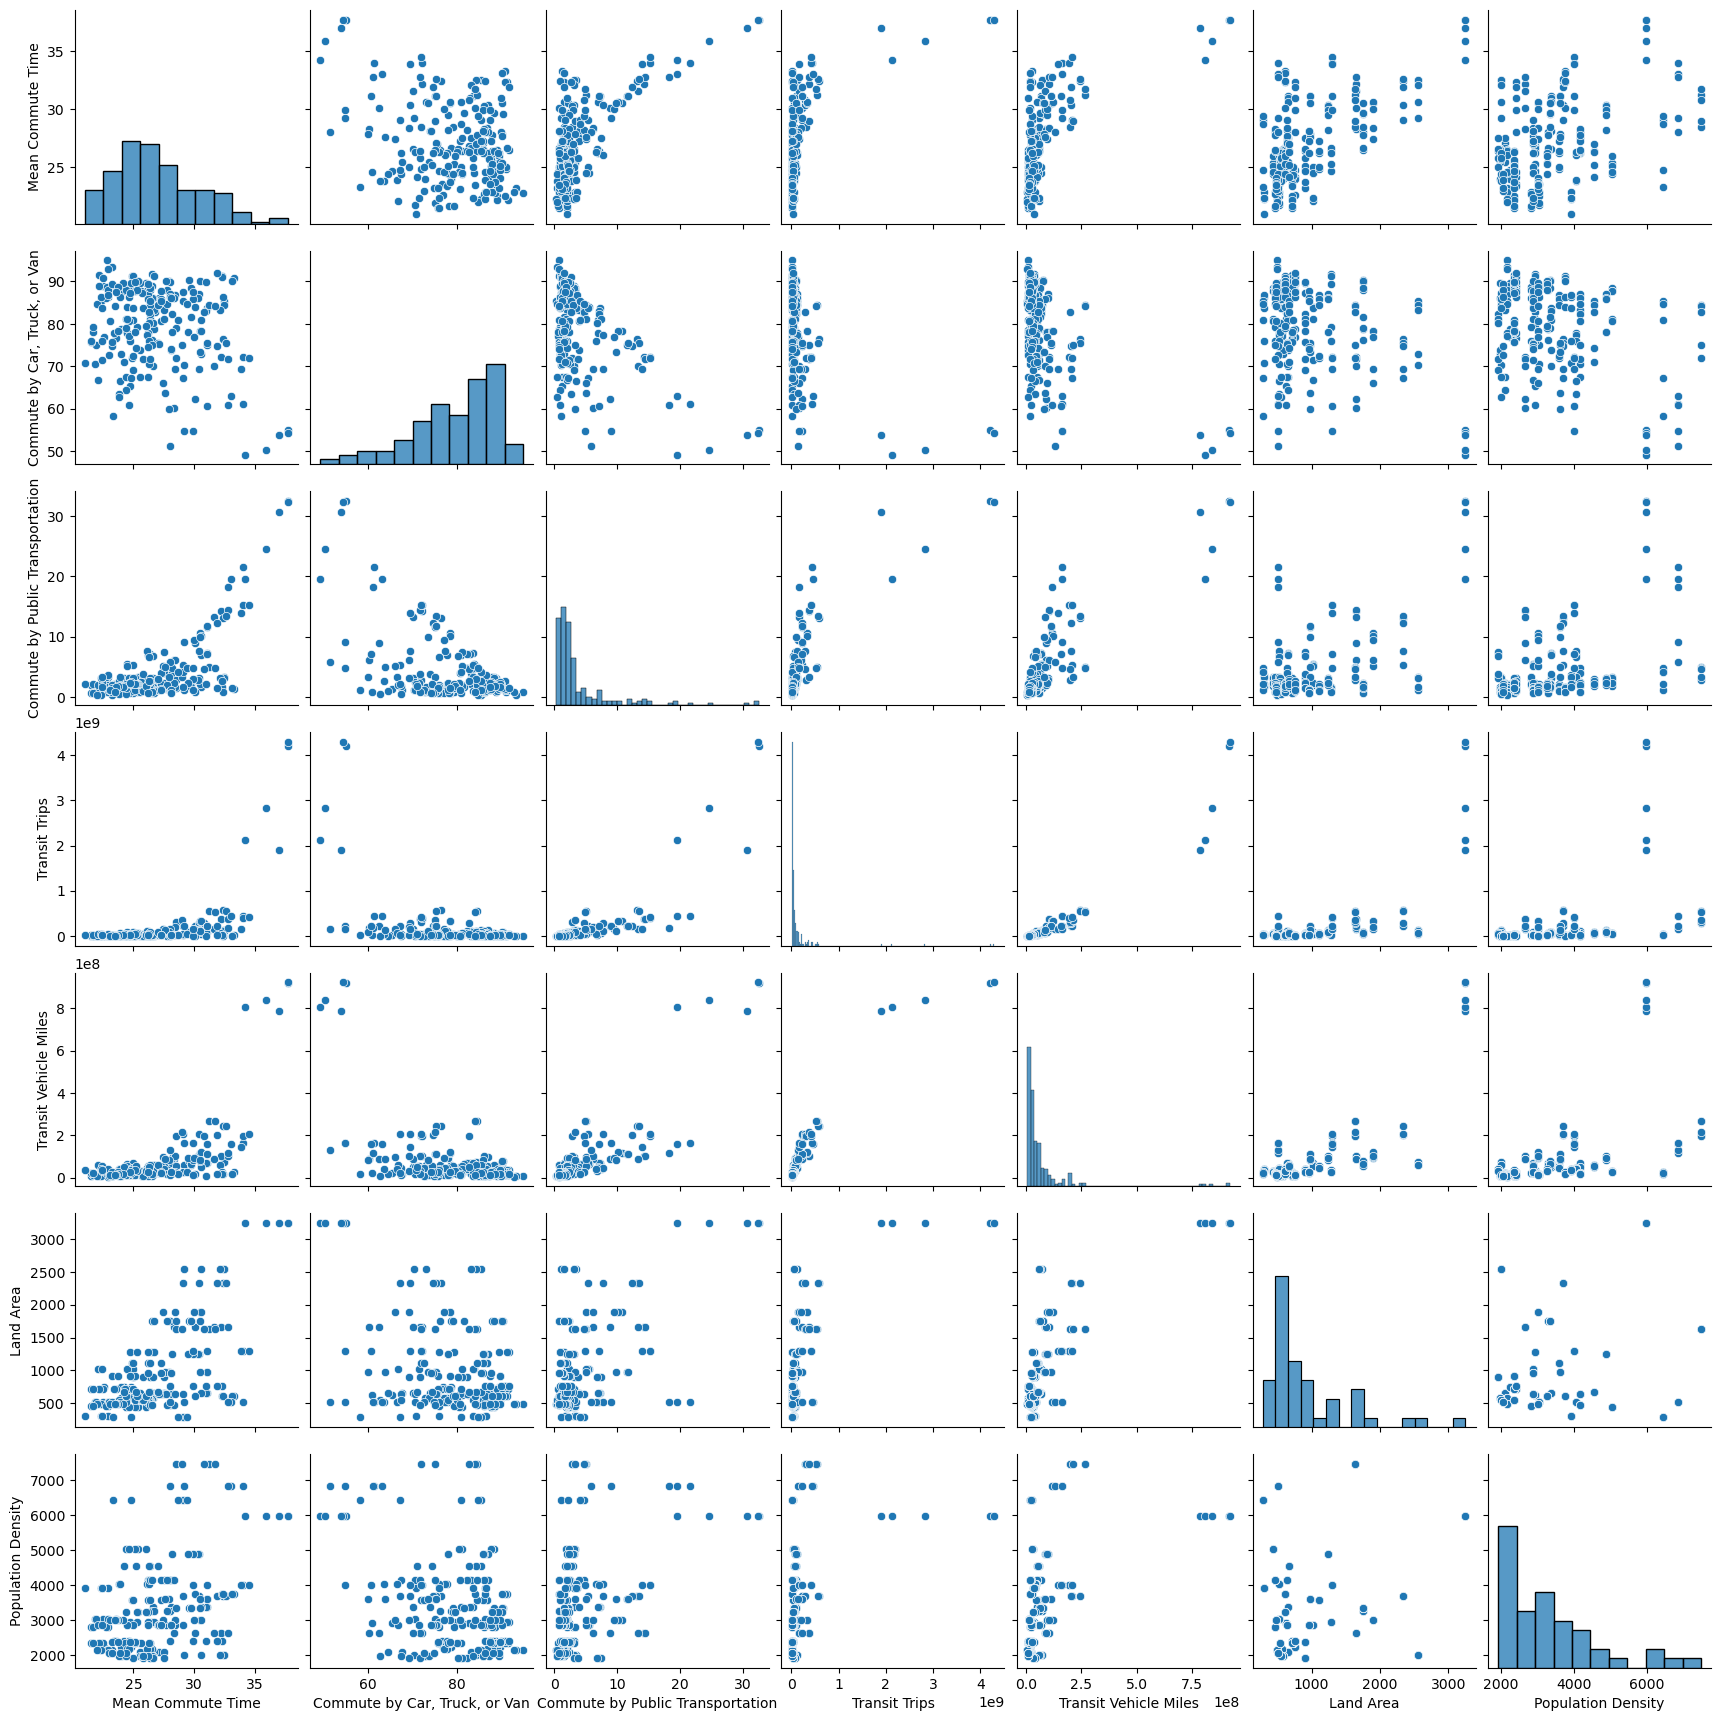

In [20]:
# Create a pair plot 

g = sns.pairplot(df_commuter_transit_filtered_2)

From these pair plots, mean commute time, transit trips, transit vehicle miles, and commuting by public transportation all appear to be positively correlated with each other. 

I would like to explore mean commute time along with commute by public transportation further. In addition, the impact of COVID-19 in the 2020 to 2022 years on the variables of transit trips and transit vehicle miles is another perspective I want to analyze.

#### Categorical plots

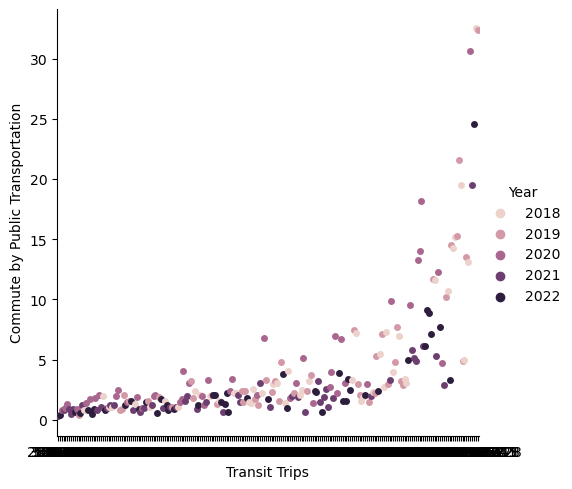

In [21]:
# Create a categorical plot in seaborn using the price categories created above

g = sns.catplot(x="Transit Trips", y="Commute by Public Transportation", hue="Year", data=df_commuter_transit_filtered)


From this chart, we see that many of the lighter circles are higher compared to the darker circles. <br>
This shows that 2018 and 2019 year had individuals commuting more by public transportation than in 2020 to 2022.

My previous questions:
•	How much did ridership decrease by?
•	Has ridership returned to normal? If not, how far are pre-pandemic ridership numbers is post-pandemic numbers?
•	How do urban areas compare across the United States in terms of returning to commuting patterns from pre-pandemic?
•	How has the advent of work from home changed commuting patterns?

From the above categorical plot, we see that transit trips have lower values for the pandemic years of 2020 to 2022.